In [1]:
import requests
from bs4 import BeautifulSoup
import scipy.io
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import pickle
from time import sleep
import timeit
import string
import re

#import snips as snp  # my snippets
#snp.prettyplot(matplotlib)  # my aesthetic preferences for plotting
%matplotlib inline

In [2]:
pkl_filename_master = "df_games.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_games = pickle.load(picklefile)

In [3]:
df_games_check = df_games.head(10)

In [4]:
df_games_check.columns

Index([u'id', u'name', u'year_released', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category', u'attributes'],
      dtype='object')

In [5]:
import string
import re, nltk

# Setup nltk corpora path
nltk_path = '~/nltk_data'
nltk.data.path.insert(0, nltk_path)


def nlp_prep(df, column):
    new_column = column + "_nlp_prepped"
    #sLength = len(df)
    #df[new_column] = pd.Series(np.random.randn(sLength), index=df.index)
    NLP_prepped = []
    #for i in range(len(df)):
    for i in range(10):
        text = str(df.iloc[i][column])
        text_lower = text.lower()
        #text_numbers = map(lambda x: re.sub(r"""\w*\d\w*""", '', x), text_lower)
        text_numbers = re.sub(r"""\w*\d\w*""", '', text_lower)
        text_re = re.compile('[%s]' % re.escape(string.punctuation))
        text_sym = text_re.sub(' ', text_numbers) 
        NLP_prepped.append(text_sym)
    
    df[new_column] = NLP_prepped
        #print( text_sym)

In [6]:
nlp_prep(df_games_check, "description")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df_games_check.head(1)

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes,description_nlp_prepped
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...",in catan formerly the settlers of catan pla...


In [8]:
from nltk.tokenize import word_tokenize

def word_tokens(df, column):
    new_column = column + "_tokenized"
    tokenized = []
    #for i in range(len(df)):
    for i in range(10):
        text = str(df.iloc[i][column])  
        text_tokenized = word_tokenize(text)
        tokenized.append(text_tokenized)
        
    df[new_column] = tokenized
        


In [9]:
word_tokens(df_games_check, 'description_nlp_prepped')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
df_games_check.head(1)

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes,description_nlp_prepped,description_nlp_prepped_tokenized
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...",in catan formerly the settlers of catan pla...,"[in, catan, formerly, the, settlers, of, catan..."


In [11]:
from nltk.corpus import stopwords

def generalize_fun(corpus, lambda_fun):
    # must handle a list of lists (tokenized docs) and also a simple list
    #print(corpus)
    #print(type(corpus))
    if isinstance(corpus[0], list):
    #if isinstance(corpus, list):
        print("list!")
        # list of lists
        corpus = map(lambda_fun, corpus)
    else:
        # single list
        print("not list!")
        corpus = lambda_fun(corpus)
        
    return list(corpus)

def remove_stopwords(df, column):
    new_column = column + "_stopwords_removed"
    stopwords_cleaned = []
    stop_words = stopwords.words('english')
    #filter_fun = lambda x: list(filter(lambda x: x not in stop_words, x))
    filter_fun = lambda x: list(filter(lambda x: x not in stop_words, x))


    #for i in range(len(df)):
    for i in range(1):
        text = df.iloc[i][column] 
        #print(text)
        text_filtered = generalize_fun(text, filter_fun)
        print(text_filtered) 
        
    #df[new_column] = tokenized

In [12]:
remove_stopwords(df_games_check, "description_nlp_preppedtokenized")

KeyError: 'description_nlp_preppedtokenized'

Finish this later -> Now ty count vectorizer!

In [13]:
corpus_orig_1 =list(df_games_check['description'])
corpus_orig = []
for i in corpus_orig_1:
    remove_unicode = str(i)
    corpus_orig.append(remove_unicode)

corpus_orig

["In Catan (formerly The Settlers of Catan), players try to be the dominant force on the island of Catan by building settlements, cities, and roads. On each turn dice are rolled to determine what resources the island produces. Players collect these resources (cards)&mdash;wood, grain, brick, sheep, or stone&mdash;to build up their civilizations to get to 10 victory points and win the game.&#10;&#10;Setup includes randomly placing large hexagonal tiles (each showing a resource or the desert) in a honeycomb shape and surrounding them with water tiles, some of which contain ports of exchange. Number disks, which will correspond to die rolls (two 6-sided dice are used), are placed on each resource tile. Each player is given two settlements (think: houses) and roads (sticks) which are, in turn, placed on intersections and borders of the resource tiles. Players collect a hand of resource cards based on which hex tiles their last-placed house is adjacent to. A robber pawn is placed on the des

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(corpus_orig)
X = X.toarray()

X

array([[14,  0,  0, ...,  0,  0,  0],
       [ 4,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ..., 
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  4,  6,  1],
       [10,  0,  0, ...,  2,  2,  0]])

In [15]:
import pandas as pd
pd.DataFrame(X,
             columns=cv.get_feature_names())

,10,11,13,14,140,144,15,160,20,2009,...,work,world,worth,would,wouldn,write,yet,you,your,zany
0,14,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,9,8,0
4,8,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,4,0
5,10,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,11,1,1,2,1,0,0,1,0,0,...,1,0,0,0,0,0,0,8,4,0
7,12,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,12,0,0,1,0,0,0,0,1,0,...,0,3,0,0,0,0,1,4,6,1
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0


In [16]:
remove_nums = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())

cv = CountVectorizer(preprocessor=remove_nums)

X = cv.fit_transform(corpus_orig).toarray()
pd.DataFrame(X,
             columns=cv.get_feature_names())

,abilities,ability,able,about,accelerate,access,accommodate,accomplished,accumulated,acquire,...,work,world,worth,would,wouldn,write,yet,you,your,zany
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,9,8,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,4,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,8,4,0
7,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,3,0,0,0,0,1,4,6,1
9,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2,2,0


In [17]:
def lower_alpha_num(corpus):
    # convert to lower case
    corpus = map(str.lower, corpus)
    
    # remove alpha-numerical words
    corpus = map(lambda x: re.sub(r"""\w*\d\w*""", '', x), corpus)
    return list(corpus)



In [18]:
# avoid having to normalize in code below
corpus_norm = lower_alpha_num(corpus_orig)

In [19]:
cv = CountVectorizer(binary=True)

X = cv.fit_transform(corpus_norm).toarray()
pd.DataFrame(X,
             columns=cv.get_feature_names())

,abilities,ability,able,about,accelerate,access,accommodate,accomplished,accumulated,acquire,...,work,world,worth,would,wouldn,write,yet,you,your,zany
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
7,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,1,1
9,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [20]:
cv = CountVectorizer(ngram_range=(1,2))

X = cv.fit_transform(corpus_norm).toarray()
pd.DataFrame(X,
             columns=cv.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9
abilities,0,0,1,0,0,0,0,1,1,0
abilities buildings,0,0,0,0,0,0,0,1,0,0
abilities but,0,0,1,0,0,0,0,0,0,0
abilities of,0,0,0,0,0,0,0,0,1,0
ability,1,0,0,0,0,0,0,0,0,0
ability to,1,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,1,0,0
able to,0,0,0,0,0,0,0,1,0,0
about,0,0,0,0,0,0,1,0,0,1
about having,0,0,0,0,0,0,1,0,0,0


In [21]:
cv = CountVectorizer(stop_words=stopwords.words('english'))

X = cv.fit_transform(corpus_norm).toarray()
pd.DataFrame(X,
             columns=cv.get_feature_names())

,abilities,ability,able,accelerate,access,accommodate,accomplished,accumulated,acquire,action,...,wonders,wood,wooden,work,world,worth,would,write,yet,zany
0,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,2,...,0,1,1,1,0,0,0,0,0,0
7,1,0,1,0,0,0,0,1,0,2,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,3,0,0,0,1,1
9,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Try some topic modeling!

In [22]:
from pprint import pprint

from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
ng_train = corpus_orig

In [24]:
ng_train.data[0]

AttributeError: 'list' object has no attribute 'data'

In [25]:
n_topics = 3
n_iter = 10

lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42)

lda.fit(X)

/anaconda/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=3, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

## Try another approach 

http://brandonrose.org/clustering

In [26]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3

In [27]:
df_games_test = df_games.copy()
df_games_test = df_games_test.head(20)
df_games_test

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,..."
1,822,Carcassonne,2000,7.335,7.44,67439,//cf.geekdo-images.com/images/pic2337577_mt.jpg,https://boardgamegeek.com/boardgame/822/carcas...,1,2,5,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]"
2,30549,Pandemic,2008,7.585,7.67,62799,//cf.geekdo-images.com/images/pic1534148_mt.jpg,https://boardgamegeek.com/boardgame/30549/pand...,2,2,4,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P..."
3,36218,Dominion,2008,7.607,7.7,56192,//cf.geekdo-images.com/images/pic394356_mt.jpg,https://boardgamegeek.com/boardgame/36218/domi...,3,2,4,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man..."
4,68448,7 Wonders,2010,7.749,7.84,52043,//cf.geekdo-images.com/images/pic860217_mt.jpg,https://boardgamegeek.com/boardgame/68448/7-wo...,4,2,7,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio..."
5,9209,Ticket to Ride,2004,7.39,7.48,48498,//cf.geekdo-images.com/images/pic38668_mt.jpg,https://boardgamegeek.com/boardgame/9209/ticke...,5,2,5,"With elegantly simple gameplay, Ticket to Ride...","[Trains, Travel]","[Hand Management, Route/Network Building, Set ..."
6,31260,Agricola,2007,7.963,8.06,48462,//cf.geekdo-images.com/images/pic259085_mt.jpg,https://boardgamegeek.com/boardgame/31260/agri...,6,1,5,Description from BoardgameNews&#10;&#10;In Agr...,"[Animals, Economic, Farming]","[Card Drafting, Hand Management, Variable Play..."
7,3076,Puerto Rico,2002,7.984,8.09,48012,//cf.geekdo-images.com/images/pic158548_mt.jpg,https://boardgamegeek.com/boardgame/3076/puert...,7,2,5,In Puerto Rico players assume the roles of col...,"[City Building, Economic, Farming]",[Variable Phase Order]
8,40692,Small World,2009,7.276,7.36,43373,//cf.geekdo-images.com/images/pic428828_mt.jpg,https://boardgamegeek.com/boardgame/40692/smal...,8,2,5,"In Small World, players vie for conquest and c...","[Fantasy, Fighting, Territory Building]","[Area Control / Area Influence, Area Movement,..."
9,2651,Power Grid,2004,7.864,7.94,42212,//cf.geekdo-images.com/images/pic173153_mt.jpg,https://boardgamegeek.com/boardgame/2651/power...,9,2,6,Power Grid is the updated release of the Fried...,"[Economic, Industry / Manufacturing]","[Auction/Bidding, Route/Network Building]"


In [28]:
titles = df_games['name'].tolist()
#titles = df_games_test['name'].tolist()

In [29]:
len(titles)

1600

In [30]:
synopses = df_games['description'].tolist()
#synopses = df_games_test['description'].tolist()

In [31]:
print(titles[:10]) #first 10 titles

[u'Catan', u'Carcassonne', u'Pandemic', u'Dominion', u'7 Wonders', u'Ticket to Ride', u'Agricola', u'Puerto Rico', u'Small World', u'Power Grid']


In [73]:
print(titles[101])

Village


In [32]:
print(synopses[0][:200] )

In Catan (formerly The Settlers of Catan), players try to be the dominant force on the island of Catan by building settlements, cities, and roads. On each turn dice are rolled to determine what resour


In [33]:
# load nltk's English stopwords as variable called 'stopwords'
#stopwords = nltk.corpus.stopwords.words('english')

In [34]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [35]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


In [36]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [37]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 371178 items in vocab_frame


In [38]:
print(vocab_frame.head())
print
print
print
print

            words
in             in
catan       catan
former   formerly
the           the
settler  settlers






In [79]:
pkl_filename_master = "stop_words.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    stop_words= pickle.load(picklefile)

In [80]:
len(stop_words)

1827

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000,
                                 min_df=10, stop_words=stop_words,
                                 use_idf=True, tokenizer= tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)


CPU times: user 19 s, sys: 798 ms, total: 19.8 s
Wall time: 22.9 s
(1600, 2000)


In [90]:
terms = tfidf_vectorizer.get_feature_names()

In [83]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.5, max_features=2000,
                                 min_df=10, stop_words=stop_words,
                                tokenizer= tokenize_and_stem, ngram_range=(1,3))
#t0 = time()
tf_matrix = tf_vectorizer.fit_transform(synopses)
#print("done in %0.3fs." % (time() - t0))
print(tf_matrix.shape)

Extracting tf features for LDA...
(1600, 2000)


In [84]:
terms_tf = tf_vectorizer.get_feature_names()

In [88]:
nmf.components_

array([[ 0.00640488,  0.00830402,  0.00206309, ...,  0.00515976,
         0.03208149,  0.01310947],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.24928107,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.01470183]])

In [85]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
#n_samples = 2000
n_features = 2000
n_topics = 20
n_top_words = 20


# Fit the NMF model
#print("Fitting the NMF model with tf-idf features, "
     # "n_samples=%d and n_features=%d..."
     # % (n_samples, n_features))
#t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf_matrix)
#print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

#print("Fitting LDA models with tf features, "
#      "n_samples=%d and n_features=%d..."
#      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
#t0 = time()
lda.fit(tf_matrix)
#print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in NMF model:
Topic #0:
round deck hand onli place differ start move power order victori draw set collect mani mdash edit tri world five
Topic #1:
hero villain adventur dark deck quest dungeon legendari zombi marvel evil cooper scenario defeat overlord abil realm power shadow featur
Topic #2:
tile place tile place place tile meepl adjac connect field road settlement tile tile worker hex next type match landscap border countri anoth
Topic #3:
build worker resourc construct build build money phase built architect construct build district victori builder provid castl develop earn round place trade
Topic #4:
war battl unit armi star command scenario forc combat star war map includ power alli world control empir faction miniatur system
Topic #5:
piec place oppon move squar oppon piec captur tower hive place piec jump made stack ani white row move piec block space project
Topic #6:
ship pirat captain island trade sea crew port merchant star cargo explor fleet sail harbor space combat

In [78]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents, titles):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print( " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        title_list = []
        for doc_index in top_doc_indices:
            #print(doc_index)
            #print(titles[doc_index])
            title_list.append(titles[doc_index]) 
            #print(documents[doc_index])
        
        print(title_list)  
nmf_model = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_matrix)
nmf_W = nmf_model.transform(tfidf_matrix)
nmf_H = nmf_model.components_

no_top_words = 20
no_top_documents = 30
display_topics(nmf_H, nmf_W, tfidf_feature_names, synopses, no_top_words, no_top_documents, titles)


Topic 0:
action round place hand move deck onli differ start order draw collect victori color money mdash choos tri mani space
[u'Edo', u'Macao', u'Last Will', u'Power Struggle', u'Tokaido', u'Agricola', u'Patchwork', u'Basari', u'Luna', u'The Voyages of Marco Polo', u'Colt Express', u'Ad Astra', u'Traders of Osaka', u'Bora Bora', u'Alchemists', u'Copycat', u'Linko!', u'Rat-a-Tat Cat', u'Livingstone', u'The Game of Life', u"Odin's Ravens", u'Australia', u'Bruxelles 1893', u'The Staufer Dynasty', u'Space Hulk: Death Angel \u2013 The Card Game', u'Murano', u'Vanuatu', u'Saint Petersburg', u'Grand Austria Hotel', u'Legacy: The Testament of Duke de Crecy']
Topic 1:
monster dungeon level treasur encount defeat monster usual defeat dragon acquir class involv result kill door power spell boss dure kick
[u'Super Munchkin', u'Munchkin Bites!', u'Munchkin Cthulhu', u'Munchkin Fu', u'Star Munchkin', u'Munchkin', u'Munchkin Booty', u'Dungeon!', u'Munchkin Quest', u'Munchkin Zombies', u'Thunderston

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

K means clustering - 8 clusters

In [92]:
from sklearn.cluster import KMeans

num_clusters = 11

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 26.1 s, sys: 519 ms, total: 26.6 s
Wall time: 16.5 s


In [93]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

#joblib.dump(km,  'doc_cluster_8.pkl')

#km = joblib.load('doc_cluster_8.pkl')
#clusters = km.labels_.tolist()

In [94]:
len(clusters)

1600

In [95]:
len(titles)

1600

In [96]:
games = { 'title': titles, 'synopsis': synopses, 'cluster': clusters}

frame = pd.DataFrame(games, index = [clusters] , columns = ['title','cluster'])

In [97]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

5     466
8     207
1     201
10    176
7     127
6     104
9     101
3      96
4      55
0      49
2      18
Name: cluster, dtype: int64

In [98]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        #print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: investigators, horror, smash, answer, ancient, cthulhu, mad, mystery, gates, monsters, elders, murdered, spells, clues, black,

Cluster 0 titles: Arkham Horror, Eldritch Horror, Smash Up, Elder Sign, Cards Against Humanity, Mr. Jack, Mansions of Madness, Sherlock Holmes Consulting Detective: The Thames Murders & Other Cases, Mystery of the Abbey, Mansions of Madness: Second Edition, Arkham Horror: Dunwich Horror Expansion, Pictionary, Arkham Horror: The Card Game, Smash Up: Awesome Level 9000, Deception: Murder in Hong Kong, Tajemnicze Domostwo, Arkham Horror: The King in Yellow Expansion, Eldritch Horror: Forsaken Lore, Arkham Horror: Curse of the Dark Pharaoh Expansion, Arkham Horror: Innsmouth Horror Expansion, Smash Up: Science Fiction Double Feature, Pandemic: Reign of Cthulhu, Call of Cthulhu: The Card Game, Arkham Horror: Kingsport Horror Expansion, Smash Up: The Obligatory Cthulhu Set, Black Stories, Elder Sign: Unseen Forces, The Big Bo

In [413]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()


Plotting....

In [414]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

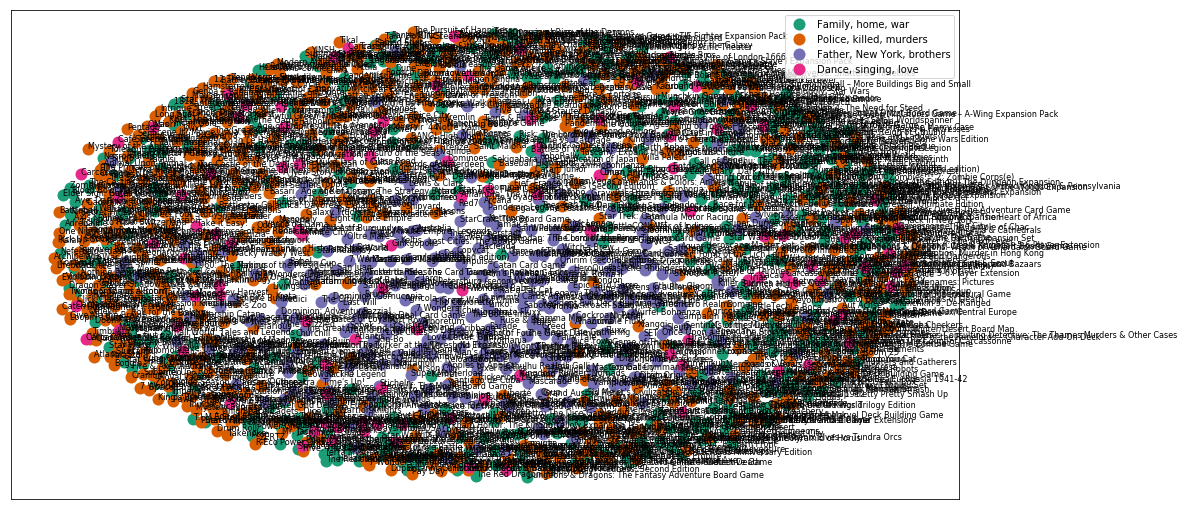

In [415]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## Try to find the optimum number of clusters

In [70]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [90]:
SSEs = []
Sil_coefs = []
Inertia = []
for k in range(2,100):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf_matrix)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(tfidf_matrix, labels, metric='euclidean'))
    # SSEs.append(get_SSE(X_digits, labels)) # The SSE is just inertia, we
    SSEs.append(km.inertia_)            # could have just said km.inertia_

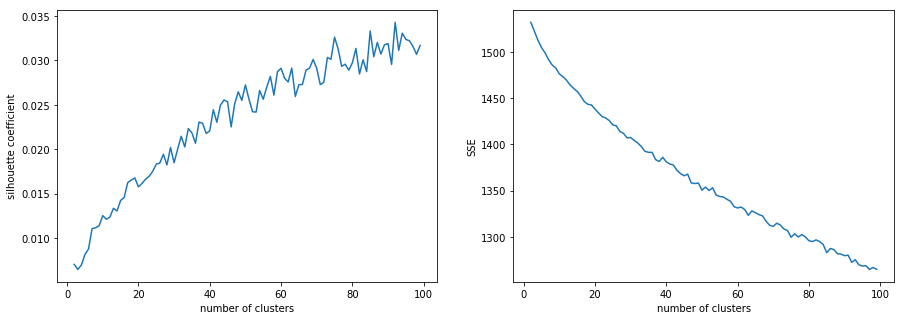

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,100)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

Try Lots of Clusters.....

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features = 2000,
                                 min_df=10, stop_words = stop_words,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 21.1 s, sys: 494 ms, total: 21.6 s
Wall time: 23.1 s
(1600, 2000)


In [109]:
terms = tfidf_vectorizer.get_feature_names()

In [110]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [111]:
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 29.4 s, sys: 295 ms, total: 29.7 s
Wall time: 15.8 s


In [112]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

#joblib.dump(km,  'doc_cluster_10.pkl')

#km = joblib.load('doc_cluster_10.pkl')
#clusters = km.labels_.tolist()

In [113]:
games = { 'title': titles, 'synopsis': synopses, 'cluster': clusters}

frame = pd.DataFrame(games, index = [clusters] , columns = ['title','cluster'])

In [114]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

18    326
7     120
14    119
6     111
11    102
1      93
2      93
10     82
8      70
17     64
9      61
5      61
3      57
0      48
13     45
16     41
12     33
19     32
15     24
4      18
Name: cluster, dtype: int64

In [115]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: uniting, states, allies, axis, nation, war, amp, uniting, army, map,

Cluster 0 titles: Twilight Struggle, Diplomacy, Axis & Allies, Lewis & Clark, Nations, Imperial, 1960: The Making of the President, A Few Acres of Snow, Axis & Allies, Combat Commander: Europe, Antike, Britannia, Struggle of Empires, Hammer of the Scots, Labyrinth: The War on Terror, 2001 – ?, Here I Stand, BattleTech, Trans Europa, Nations: The Dice Game, T.I.M.E Stories: The Marcy Case, Freedom: The Underground Railroad, 51st State, 1775: Rebellion, Campaign Manager 2008, Sekigahara: The Unification of Japan, Axis & Allies: Europe, Friedrich, Fortress America, Manoeuvre, Maria, Commands & Colors: Napoleonics, 1812: The Invasion of Canada, Perikles, Axis & Allies: Pacific, 2 de Mayo, 51st State: Master Set, A House Divided, Axis & Allies Anniversary Edition, Axis & Allies: D-Day, 1989: Dawn of Freedom, Axis & Allies: 1942, Rise and Decline of the Third Reich, Founding Fathers